In [1]:
# grade: 5/5 great work! 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from ipywidgets import interact
import homework3_utils as utils
%matplotlib inline

C:\Users\Emma\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Homework 3
## Emma DeWitt Cotter
## CSE 599

## How do seasonal, weekly, and daily variations affect traffic on the Fremont bridge? 

This assignment investigates how trends on the fremont bridge are affected by temporal variations. Two trends that were observed in homweorks 1 and 2 are as follows:
- There are fewer riders on rainy days.
- There are fewer riders in the winter.
- There are a nearly equal number of northbound and southbound riders.

By isolating data during rush hour, during different seasons, and during different days of the week, I will further explore these trends.

## Import Data

- Weather Data is from NOAA National Climactic Data Center
- Fremont bridge bike traffic data from www.seattle.gov
- Both data sets are indexed by time to simplify further analysis
- A new column for total bike traffic (summing northbound and southbound) is created.

In [2]:
weather,trips = utils.load_weather_and_trip_data()

open_data_year_one.zip  already exists
weather_data.csv  already exists


# Question 1: Are commuters more likely to ride in the rain?

Results from homework two showed that overall, there are less bikers crossing Fremont bridge in the rain. This left me wondering - how does the number of riders during rush hour change in the rain, versus weekend/mid-day riders who are more likely riding for exercise or enjoyment. Are commuters more likely to continue to ride in the rain? 

### Instructions for data manipulation
- The free variables are the start and end time of the defined "rush hour" or period of interest (blue), and the option to include weekends in the selected period of interest. If "weekends" is not selected, Saturdays and Sundays are excluded from the selected data.


There is a  46.96 % difference between rainy and dry days during selected hours


<function __main__.plotPrecipTimes>

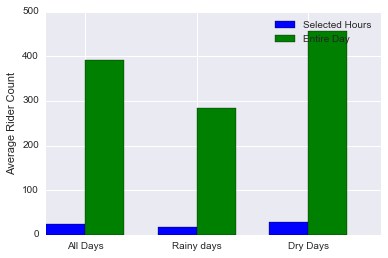

In [3]:
hourly_trips = utils.resample_trip_data_hourly(trips)

def plotPrecipTimes(startTime,endTime,weekends):
    # sum rider count for defined hours
    rushHour = hourly_trips[np.logical_and(hourly_trips.index.hour<=endTime,hourly_trips.index.hour>=startTime)].resample('1D',how = 'sum')
    rushHour = rushHour.join(weather['PRCP'])

    if not(weekends):
        rushHour = rushHour[np.logical_and(rushHour.index.weekday!=5,rushHour.index.weekday !=6)]

    rain_rushHour = rushHour[rushHour['PRCP']!=0]
    dry_rushHour = rushHour[rushHour['PRCP']==0]

    bikedataDaily = hourly_trips.resample('1D',how = 'sum').join(weather['PRCP'])
    rain_total = bikedataDaily[bikedataDaily['PRCP']!=0].resample('1D',how='sum')
    dry_total = bikedataDaily[bikedataDaily['PRCP']==0].resample('1D',how='sum')


    rushHourMeans = (rushHour['counts'].mean(),rain_rushHour['counts'].mean(),
                     dry_rushHour['counts'].mean())

    totalMeans = (bikedataDaily['counts'].mean(),rain_total['counts'].mean(),
                 dry_total['counts'].mean())

    fig1,ax1 = plt.subplots()
    ind = np.arange(3)
    width = 0.35
    rushHourRects = ax1.bar(ind, rushHourMeans, width, color='b')
    totalRects = ax1.bar(ind+width, totalMeans, width, color = 'g')


    ax1.set_ylabel('Average Rider Count')
    ax1.set_xticks(ind+width)
    ax1.set_xticklabels(('All Days','Rainy days','Dry Days'))

    ax1.legend((rushHourRects[0],totalRects[0]),('Selected Hours','Entire Day'))

    pctdiff_rainy = abs(dry_rushHour['counts'].mean()-rain_rushHour['counts'].mean())/(
        (rushHour['counts'].mean()+rain_rushHour['counts'].mean())/2)

    print('There is a ', round(pctdiff_rainy*100,2), '% difference between rainy and dry days during selected hours')

interact(plotPrecipTimes,startTime=(0,24),endTime=(0,24),weekends=False)

### Conclusions:
Review of the data indicates that my prediction was correct - there is a smaller percent difference between rainy and dry days during popular commuting hours. For example, there is 35.67% difference from 7-9 AM versus a 46.16% difference from 10 AM - 2 PM.

Interestingly, including or discluding weekends does not have a major effect on the difference between rainy and dry day bike usage during morning rush hour. However, it does have a much more notable difference (43.48% vs 51.54%) during evening rush hour (5-7 PM). 

# Question 2: How does time of day affect the ratio of annual pass to short-term pass holders?

The pronto data includes, for each trip, the type of pass holder. I'm curious how trends might be different for annual members and short-term pass holders. Are annual pass members more likely be riding during rush hour than short-term pass holders? Are short term pass holders more likely to be riding on weekends, when tourist activity might be hihger?

### Instructions for data manipulation
- Select time of day
- Select weekends/weekday. If neither or both are selected, all days of the week will be used.

There is a  1.27 % difference between annual pass and short-term pass holders during selected hours


<function __main__.plotRiderType>

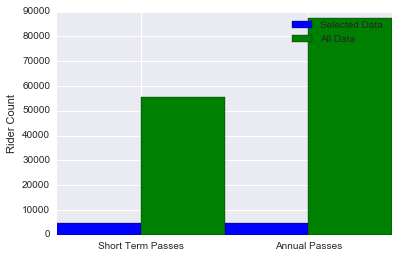

In [4]:
def plotRiderType(startTime,endTime,weekdays,weekends): 
    
    selected_data = trips[np.logical_and(trips.index.hour<=endTime,trips.index.hour>=startTime)]
  
    # select days of week
    if weekdays and not(weekends):
        selected_data = selected_data[np.logical_or(selected_data.index.weekday!=5,selected_data.index.weekday !=6)]
    elif weekends and not(weekdays):
        selected_data = selected_data[np.logical_or(selected_data.index.weekday==5,selected_data.index.weekday ==6)]
    
    # resample
    #selected_data = selected_data.resample('1D',how='mean')
    
    passes_selected = selected_data['usertype'].value_counts(sort=False)
    passes_all = trips['usertype'].value_counts(sort=False)
    
    allData = (passes_all[0],passes_all[1])
    selected = (passes_selected[0],passes_selected[1])
    
    fig2,ax2 = plt.subplots()
    ind = np.arange(2)
    width = 0.5
    
    selectedData = ax2.bar(ind, selected, width, color='b')
    allData = ax2.bar(ind+width, allData, width, color = 'g')
    
    ax2.set_ylabel('Rider Count')
    ax2.set_xticks(ind+width)
    ax2.set_xticklabels(('Short Term Passes','Annual Passes'))
    
    ax2.legend((selectedData[0],allData[0]),('Selected Data','All Data'))

    pctdiff = abs(passes_selected[0]-passes_selected[1])/(
        (passes_selected[0]+passes_selected[1])/2)

    print('There is a ', round(pctdiff*100,2), '% difference between annual pass and short-term pass holders during selected hours')
    

interact(plotRiderType,startTime = (0,24), endTime = (0,24),weekdays = True,weekends=True)



### Conclusions

There is a strong correlation between time of day/day of week and the type of pass holder. There are many more annual pass holders riding during rush hour, and more short-term passes during the weekends and other hours. This indicates that annual pass holders are likely using the Pronto bikes to commute.

### Using the iPython Notebook

I used many features of the ipython notebook during completion of this homework assignment. Use of keyboard shortcuts greatly improved my speed in typing and navigating between cells. In particular, the CTRL + M command to change a cell format to markdown was very useful. I used the matplotlib inline magic command, which made it easier to edit code and view plots without having to switch between windows. Because I am still getting used to the keyboard shortcuts, the CTRL + M + H help command came in handy to view the list of shortcuts available.  CTRL + M + F was useful for renaming variables when I changed the question that I was asking mid-way through the assignment.